<a href="https://colab.research.google.com/github/simonemallei/complex-systems-social-graph/blob/main/recommender_social_graph/content/notebook/Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning the repository used in the notebook:

Printing the files' names in its "recommender_social_graph" directory:

In [1]:
import sys
print(sys.path)

['d:\\VS Code\\complex-systems-social-graph\\recommender_social_graph\\content\\notebook', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\python38.zip', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\DLLs', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38', '', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\win32', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\win32\\lib', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\Pythonwin']


Importing mandatory methods for the notebook:

In [2]:
import networkx as nx
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import sys
import copy
sys.path.append('.')
sys.path.append('../../')
%load_ext autoreload
%autoreload 2
from graph_creation import create_graph
from abeba_methods import simulate_epoch, compute_activation
from metrics import polarisation, sarle_bimodality, disagreement
from content.metrics import feed_entropy, feed_satisfaction
from content.content_recommender import simulate_epoch_content_recommender

Creation and print of a graph:

ENDED
Starting graph: 
  node label    opinion value
------------  ---------------
           0            0.065
           1            0.209
           2           -0.924
           3            0.657
           4           -0.703
           5            0.729
           6            0.979
           7            0.162
           8            0.174
           9           -0.958
          10            0.69
          11           -0.273
          12            0.437
          13           -0.594
          14            0.471
          15           -0.599
          16           -0.872
          17           -0.427
          18           -0.253
          19           -0.481
          20           -0.8
          21            0.889
          22            0.747
          23           -0.94
          24           -0.235
          25            0.078
          26            0.118
          27           -0.462
          28           -0.292
          29           -0.043
          30         

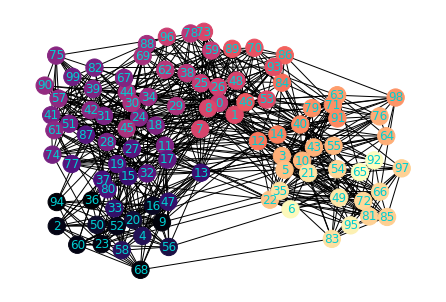

In [3]:
# create graph and update it with ABEBA model (with epsilon-error == 0.0)
G = create_graph(100, [5], avg_friend = 10, prob_post = [0.5], hp_alpha=2, hp_beta=0.3)
#G = apply_initial_feed(G)
print("ENDED")
print("Starting graph: ")
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

Simulating 100 updates of 2 graphs:
- Previous graph with no recommender
- Previous graph with random content recommender

Then showing the two graphs' opinions and their polarisation value.

ENDED COPY
Epoch	Random	Normal	Nudge	Nudge Var
0
Polarisation (RANDOM): 36.71871127088665
Bimodality (RANDOM): -0.8532492766891916
Disagreement (RANDOM - mean): 6.355041037624497
Disagreement (RANDOM - std): 3.8247965282940135
Disagreement (RANDOM - coverage): 100.0%
Entropy (RANDOM - mean): 0.0
Entropy (RANDOM - std): 0.0
Entropy (RANDOM - coverage): 50.0%
Satisfaction (RANDOM - mean): 0.4799273951851192
Satisfaction (RANDOM - std): 0.4396755991352026
Satisfaction (RANDOM - coverage): 50.0%
Polarisation (NORMAL): 26.43656711821329
Bimodality (NORMAL): -1.1274496833985055
Disagreement (NORMAL - mean): 5.253291084791833
Disagreement (NORMAL - std): 3.0356349300831904
Disagreement (NORMAL - coverage): 100.0%
Entropy (NORMAL - mean): 0.0
Entropy (NORMAL - std): 0.0
Entropy (NORMAL - coverage): 50.0%
Satisfaction (NORMAL - mean): 0.4033564686518665
Satisfaction (NORMAL - std): 0.20751786680430345
Satisfaction (NORMAL - coverage): 50.0%
Polarisation (NUDGE): 33.081657291222044
Bimodality (N

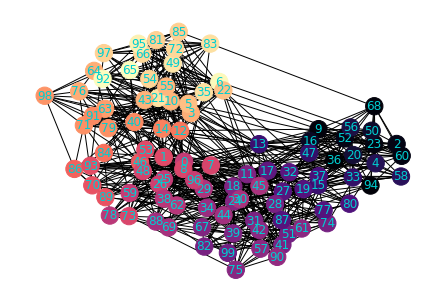

No Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            1
           1            1
           2           -0.915
           3            1
           4           -0.877
           5            1
           6            1
           7            1
           8            1
           9           -1
          10            1
          11           -1
          12            1
          13           -1
          14            1
          15           -0.818
          16           -1
          17           -1
          18           -1
          19           -1
          20           -0.965
          21            1
          22            0.819
          23           -0.97
          24           -0.999
          25            1
          26            1
          27           -1
          28           -0.918
          29           -0.462
          30           -1
          31           -0.768
          32           -1
          33         

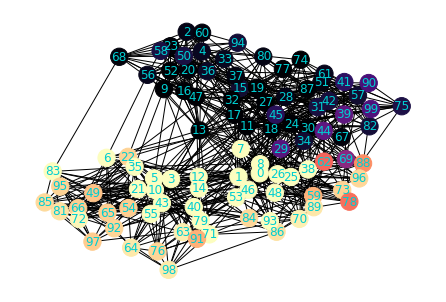

Random Recommender Nodes:
  node label    opinion value
------------  ---------------
           0           -1
           1            1
           2           -0.961
           3            1
           4           -0.967
           5            1
           6            1
           7           -1
           8           -1
           9           -1
          10            1
          11           -1
          12            1
          13           -1
          14            1
          15           -1
          16           -1
          17           -1
          18           -1
          19           -0.901
          20           -1
          21            1
          22            1
          23           -0.942
          24           -1
          25           -1
          26           -1
          27           -0.996
          28           -1
          29           -1
          30           -0.958
          31           -1
          32           -1
          33           -0.979
  

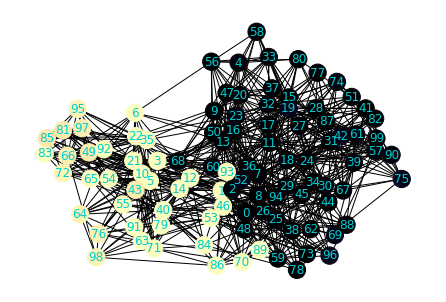

Normal Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            0.037
           1            0.041
           2           -0.167
           3            0.118
           4           -0.075
           5            0.193
           6            0.128
           7            0.027
           8            0.006
           9           -0.12
          10            0.195
          11           -0.02
          12            0.138
          13           -0.037
          14            0.174
          15           -0.095
          16           -0.081
          17           -0.064
          18           -0.081
          19           -0.103
          20           -0.154
          21            0.195
          22            0.204
          23           -0.186
          24           -0.037
          25           -0.001
          26            0.028
          27           -0.08
          28           -0.078
          29           -0.059
          30     

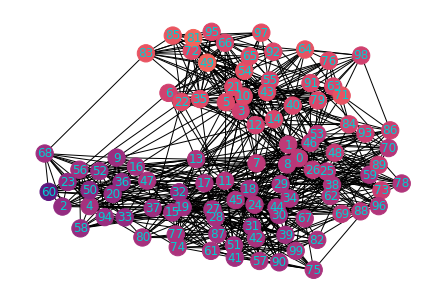

Nudge Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            1
           1            1
           2           -0.812
           3            1
           4           -0.895
           5            1
           6            1
           7            1
           8            1
           9           -1
          10            1
          11           -1
          12            1
          13           -1
          14            1
          15           -0.868
          16           -1
          17           -1
          18           -1
          19           -1
          20           -1
          21            1
          22            0.971
          23           -0.901
          24           -1
          25            1
          26            1
          27           -0.983
          28           -0.834
          29           -1
          30           -1
          31           -1
          32           -0.867
          33           -0

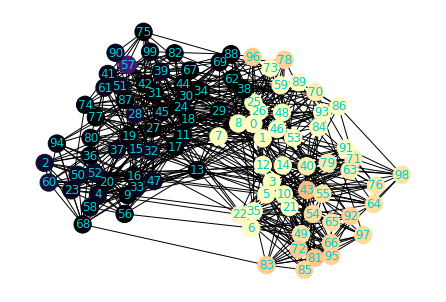

Similar Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            0.044
           1            0.479
           2           -0.441
           3            0.697
           4           -0.545
           5            0.714
           6            0.747
           7            0.027
           8            0.06
           9           -0.543
          10            0.704
          11           -0.418
          12            0.654
          13           -0.505
          14            0.705
          15           -0.428
          16           -0.473
          17           -0.47
          18           -0.364
          19           -0.513
          20           -0.497
          21            0.751
          22            0.731
          23           -0.509
          24           -0.367
          25           -0.048
          26            0.3
          27           -0.468
          28           -0.427
          29           -0.235
          30     

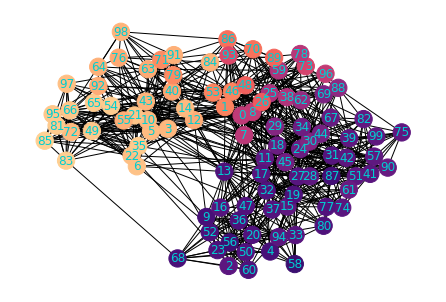

Unsimilar Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            1
           1            1
           2           -0.738
           3            1
           4           -0.623
           5            1
           6            1
           7            1
           8            1
           9           -1
          10            1
          11           -1
          12            1
          13           -1
          14            1
          15           -1
          16           -1
          17           -1
          18           -1
          19           -1
          20           -1
          21            1
          22            1
          23           -1
          24           -1
          25            1
          26           -1
          27           -1
          28           -1
          29           -1
          30           -1
          31           -1
          32           -1
          33           -0.631
          34   

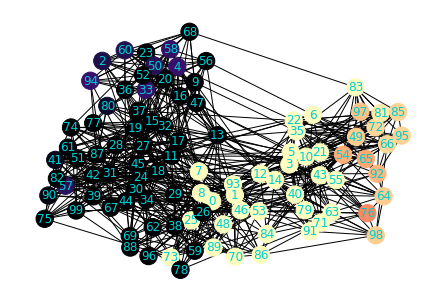

Polarisation (starting): 33.081657291222044
Bimodality (starting): -0.9304107198745133
Disagreement (starting - mean): 4.897558184987143
Disagreement (starting - std): 3.373095516018705
Entropy (starting - mean): nan
Entropy (starting - std): nan
Satisfaction (starting - mean): nan
Satisfaction (starting - std): nan
Polarisation (no recommender): 78.6500858108051
Bimodality (no recommender): -0.5290467467595363
Disagreement (no recommender - mean): -6.798321558055956
Disagreement (no recommender - std): 20.942504107528574
Entropy (no recommender - mean): nan
Entropy (no recommender - std): nan
Satisfaction (no recommender - mean): nan
Satisfaction (no recommender - std): nan
Polarisation (random recommender): 90.99634019135024
Bimodality (random recommender): -0.7099029516354405
Disagreement (random recommender - mean): -16.075862869006393
Disagreement (random recommender - std): 23.041169998146966
Entropy (random recommender - mean): 0.3336906009078464
Entropy (random recommender - st

c:\Users\simon\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\simon\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\simon\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\simon\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\simon\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.

Entropy (similar recommender - mean): 0.47969771676608436
Entropy (similar recommender - std): 0.12932810651186222
Satisfaction (similar recommender - mean): 0.6765937117937502
Satisfaction (similar recommender - std): 0.0890979483556576
Polarisation (unsimilar recommender): 88.0026607752331
Bimodality (unsimilar recommender): -0.5589978847170377
Disagreement (unsimilar recommender - mean): -18.17804859183338
Disagreement (unsimilar recommender - std): 32.38134772907117
Entropy (unsimilar recommender - mean): 0.45680739945022286
Entropy (unsimilar recommender - std): 0.2649465087226169
Satisfaction (unsimilar recommender - mean): 0.07764360095345008
Satisfaction (unsimilar recommender - std): 0.4803540728710759


In [4]:
# Simulating an epoch and printing the opinion graph obtained
starting_G = copy.deepcopy(G)
random_G = copy.deepcopy(G)
normal_G = copy.deepcopy(G)
nudge_G = copy.deepcopy(G)
similar_G = copy.deepcopy(G)
unsimilar_G = copy.deepcopy(G)
print("ENDED COPY")
random_param = {'n_post': 1}
normal_param = {'normal_mean': 0.0, 'normal_std': 0.1, 'n_post': 1}
nudge_param = {'nudge_goal': 0.0, 'n_post': 1}
similar_param = {'similar_thresh': 0.5}
unsimilar_param = {'unsimilar_thresh': 0.5}
print(f'Epoch\tRandom\tNormal\tNudge\tNudge Var')
for i in range(20):
    G = simulate_epoch(G, 0.5, epsilon = 0.1)
    random_G = simulate_epoch_content_recommender(random_G, 0.5, epsilon = 0.1,
                                                    strat_param=random_param, estim_strategy="kalman")
    normal_G = simulate_epoch_content_recommender(normal_G, 0.5, epsilon = 0.1,
                                                    strategy="normal", 
                                                    strat_param=normal_param, estim_strategy="kalman")
    nudge_G = simulate_epoch_content_recommender(nudge_G, 0.5, epsilon = 0.1,
                                                    strategy="nudge", 
                                                    strat_param=nudge_param, estim_strategy="kalman")
    similar_G = simulate_epoch_content_recommender(similar_G, 0.5, epsilon = 0.1, 
                                                      strategy="similar", 
                                                      strat_param=similar_param, estim_strategy="kalman")
    unsimilar_G = simulate_epoch_content_recommender(unsimilar_G, 0.5, epsilon = 0.1, 
                                                        strategy="unsimilar",
                                                        strat_param=unsimilar_param, estim_strategy="kalman")
    print(i)
    graphs = [random_G, normal_G, nudge_G, similar_G, unsimilar_G]
    rec_text = ["RANDOM", "NORMAL", "NUDGE", "SIMILAR", "UNSIMILAR"]
    for curr_G, text in zip(graphs, rec_text):
        print(f"Polarisation ({text}): {polarisation(curr_G)}")
        print(f"Bimodality ({text}): {sarle_bimodality(curr_G)}")
        #print(f"Disagreement ({text}): {disagreement(g)}")
        disagreement_res = disagreement(curr_G)
        if not(disagreement_res == {}):
            print(f"Disagreement ({text} - mean): {np.mean(list(disagreement_res.values()))}")
            print(f"Disagreement ({text} - std): {np.std(list(disagreement_res.values()))}")
            dis_coverage = np.round(len(list(disagreement_res.values())) / len(G.nodes()) * 100, 3)
            print(f"Disagreement ({text} - coverage): {dis_coverage}%")      
        #print(f"Entropy ({text}): {feed_entropy(g)}")
        entropy_res = feed_entropy(curr_G)
        if not(entropy_res == {}):
            print(f"Entropy ({text} - mean): {np.mean(list(entropy_res.values()))}")
            print(f"Entropy ({text} - std): {np.std(list(entropy_res.values()))}")
            entr_coverage = np.round(len(list(entropy_res.values())) / len(G.nodes()) * 100, 3)
            print(f"Entropy ({text} - coverage): {entr_coverage}%")     
        #print(f"Satisfaction ({text}): {feed_satisfaction(g)}")
        satisfaction_res = feed_satisfaction(curr_G)
        if not(satisfaction_res == {}):
            print(f"Satisfaction ({text} - mean): {np.mean(list(satisfaction_res.values()))}")
            print(f"Satisfaction ({text} - std): {np.std(list(satisfaction_res.values()))}")
            sat_coverage = np.round(len(list(satisfaction_res.values())) / len(G.nodes()) * 100, 3)
            print(f"Satisfaction ({text} - coverage): {sat_coverage}%")      


# Showing starting graph and its nodes' opinions
colors = list(nx.get_node_attributes(starting_G, 'opinion').values())
labels =  nx.get_node_attributes(starting_G, 'opinion')
print("Starting Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Starting Graph:")
nx.draw(starting_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()


# Showing graph with no recommender and its nodes' opinions
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print("No Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("No Recommender Graph:")
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with random content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(random_G, 'opinion').values())
labels =  nx.get_node_attributes(random_G, 'opinion')
print("Random Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Random Recommender Graph:")
nx.draw(random_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with normal content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(normal_G, 'opinion').values())
labels =  nx.get_node_attributes(normal_G, 'opinion')
print("Normal Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Normal Recommender Graph:")
nx.draw(normal_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with nudge content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(nudge_G, 'opinion').values())
labels =  nx.get_node_attributes(nudge_G, 'opinion')
print("Nudge Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Nudge Recommender Graph:")
nx.draw(nudge_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with similar content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(similar_G, 'opinion').values())
labels =  nx.get_node_attributes(similar_G, 'opinion')
print("Similar Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Similar Recommender Graph:")
nx.draw(similar_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with unsimilar content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(unsimilar_G, 'opinion').values())
labels =  nx.get_node_attributes(unsimilar_G, 'opinion')
print("Unsimilar Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Unsimilar Recommender Graph:")
nx.draw(unsimilar_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

graphs = [starting_G, G, random_G, normal_G, nudge_G, similar_G, unsimilar_G]
rec_text = ["starting", "no recommender", "random recommender", "normal recommender",
            "nudge recommender", "similar recommender", 
            "unsimilar recommender"]
for g, text in zip(graphs, rec_text):
    print(f"Polarisation ({text}): {polarisation(g)}")
    print(f"Bimodality ({text}): {sarle_bimodality(g)}")
    print(f"Disagreement ({text} - mean): {np.mean(list(disagreement(g).values()))}")
    print(f"Disagreement ({text} - std): {np.std(list(disagreement(g).values()))}")
    print(f"Entropy ({text} - mean): {np.mean(list(feed_entropy(g).values()))}")
    print(f"Entropy ({text} - std): {np.std(list(feed_entropy(g).values()))}")
    print(f"Satisfaction ({text} - mean): {np.mean(list(feed_satisfaction(g).values()))}")
    print(f"Satisfaction ({text} - std): {np.std(list(feed_satisfaction(g).values()))}")